In [64]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import rpy2.robjects as ro
from functools import partial
from rpy2.robjects import pandas2ri
from rpy2.robjects.packages import importr
from rpy2.ipython import html
html.html_rdataframe = partial(html.html_rdataframe, table_class = "docutils")
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [65]:
%%R
library(mlbench)
data(BreastCancer)

In [66]:
Breast_Cancer_R_df = ro.r['BreastCancer']
with(ro.default_converter + pandas2ri.converter).context():
    Breast_Cancer_PANDAS_df = ro.conversion.get_conversion().rpy2py(Breast_Cancer_R_df)
Breast_Cancer_PANDAS_df
Breast_Cancer_PANDAS_df.isna().sum()

Id                  0
Cl.thickness        0
Cell.size           0
Cell.shape          0
Marg.adhesion       0
Epith.c.size        0
Bare.nuclei        16
Bl.cromatin         0
Normal.nucleoli     0
Mitoses             0
Class               0
dtype: int64

In [67]:
Breast_Cancer_PANDAS_df['Bare.nuclei'] = pd.to_numeric(Breast_Cancer_PANDAS_df['Bare.nuclei'])
median_val = Breast_Cancer_PANDAS_df['Bare.nuclei'].mean()
Breast_Cancer_PANDAS_df['Bare.nuclei'] = Breast_Cancer_PANDAS_df['Bare.nuclei'].fillna(median_val)
Breast_Cancer_PANDAS_df['Class'] = Breast_Cancer_PANDAS_df['Class'].replace({'benign': 1, 'malignant': -1})
Breast_Cancer_PANDAS_df = Breast_Cancer_PANDAS_df.astype(int)

/tmp/ipykernel_33559/2224922618.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Breast_Cancer_PANDAS_df['Class'] = Breast_Cancer_PANDAS_df['Class'].replace({'benign': 1, 'malignant': -1})
/tmp/ipykernel_33559/2224922618.py:4: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  Breast_Cancer_PANDAS_df['Class'] = Breast_Cancer_PANDAS_df['Class'].replace({'benign': 1, 'malignant': -1})


In [68]:
Breast_Cancer_PANDAS_df
#Breast_Cancer_PANDAS_df.isna().sum()

,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
1,1000025,5,1,1,1,2,1,3,1,1,1
2,1002945,5,4,4,5,7,10,3,2,1,1
3,1015425,3,1,1,1,2,2,3,1,1,1
4,1016277,6,8,8,1,3,4,3,7,1,1
5,1017023,4,1,1,3,2,1,3,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
695,776715,3,1,1,1,3,2,1,1,1,1
696,841769,2,1,1,1,2,1,1,1,1,1
697,888820,5,10,10,3,7,3,8,10,2,-1
698,897471,4,8,6,4,3,4,10,6,1,-1


In [69]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Breast_Cancer_PANDAS_df = Breast_Cancer_PANDAS_df.iloc[ :, 1 : ]
Breast_Cancer_PANDAS_df.iloc[ :, : Breast_Cancer_PANDAS_df.shape[1] - 1] = scaler.fit_transform(Breast_Cancer_PANDAS_df.iloc[ :, : Breast_Cancer_PANDAS_df.shape[1] - 1])
Breast_Cancer_PANDAS_df.shape

/tmp/ipykernel_33559/3398787832.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.20693572  0.20693572 -0.50386559  0.56233637 -0.14846494  1.27313768
 -1.2146669  -0.85926625 -0.85926625 -0.14846494 -1.2146669  -0.85926625
  0.20693572 -1.2146669   1.27313768  0.91773703 -0.14846494 -0.14846494
  1.983939    0.56233637  0.91773703  1.983939   -0.50386559  1.27313768
 -1.2146669   0.20693572 -0.50386559  0.20693572 -0.85926625 -1.2146669
 -0.50386559 -0.85926625  1.983939   -0.85926625 -0.50386559 -0.85926625
  1.983939    0.56233637  0.20693572 -0.85926625  0.56233637  1.983939
  0.56233637  0.20693572  1.983939   -1.2146669  -0.50386559 -1.2146669
 -0.14846494  0.91773703  1.62853834  0.20693572  1.983939    0.20693572
  1.983939    1.983939    1.27313768  1.27313768  0.20693572  1.62853834
  0.20693572 -1.2146669   1.62853834  0.56233637 -1.2146669   1.983939
 -0.14846494  0.20693572  1.27313768 -1.2146669

(699, 10)

In [70]:
Breast_Cancer_PANDAS_df

,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
1,0.206936,-0.699995,-0.743299,-0.633247,-0.549561,-0.703348,-0.179662,-0.611825,-0.343912,1
2,0.206936,0.283845,0.266875,0.768621,1.710106,1.796516,-0.179662,-0.284112,-0.343912,1
3,-0.503866,-0.699995,-0.743299,-0.633247,-0.549561,-0.425585,-0.179662,-0.611825,-0.343912,1
4,0.562336,1.595632,1.613773,-0.633247,-0.097628,0.129940,-0.179662,1.354454,-0.343912,1
5,-0.148465,-0.699995,-0.743299,0.067687,-0.549561,-0.703348,-0.179662,-0.611825,-0.343912,1
...,...,...,...,...,...,...,...,...,...,...
695,-0.503866,-0.699995,-0.743299,-0.633247,-0.097628,-0.425585,-1.000471,-0.611825,-0.343912,1
696,-0.859266,-0.699995,-0.743299,-0.633247,-0.549561,-0.703348,-1.000471,-0.611825,-0.343912,1
697,0.206936,2.251526,2.287222,0.067687,1.710106,-0.147822,1.872361,2.337594,0.239570,-1
698,-0.148465,1.595632,0.940324,0.418154,-0.097628,0.129940,2.693171,1.026741,-0.343912,-1


In [71]:
Breast_Cancer_PANDAS_df.isna().sum()

Cl.thickness       0
Cell.size          0
Cell.shape         0
Marg.adhesion      0
Epith.c.size       0
Bare.nuclei        0
Bl.cromatin        0
Normal.nucleoli    0
Mitoses            0
Class              0
dtype: int64

In [72]:
x_data = Breast_Cancer_PANDAS_df.iloc[ :, : 9]
y_data = Breast_Cancer_PANDAS_df.iloc[:, 9]

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, random_state = 0, train_size = 0.7)

In [74]:
Breast_Cancer_PANDAS_df.shape

(699, 10)

In [77]:
from sklearn.cluster import KMeans
import train_RBF
from sklearn.metrics import accuracy_score

lst_acc_test = list()
lst_acc_train = list()
lst_clusters = list()

for i in range(1, 300, 1):
    kmeans = KMeans(n_clusters = i, random_state = 0, n_init = 'auto').fit(X_train)
    cluster_labels = kmeans.labels_
    cluster_centers = kmeans.cluster_centers_
    ret_ = train_RBF.trainRBF(X_train, y_train, cluster_centers.shape[0], 0.6)
    
    yhat_test = train_RBF.y_RBF(X_test, ret_)
    yhat_test[yhat_test <= -0.5] = -1
    yhat_test[yhat_test > -0.5] = 1
    yhat_train = train_RBF.y_RBF(X_train, ret_)
    yhat_train[yhat_train <= -0.5] = -1
    yhat_train[yhat_train > -0.5] = 1

    acc_test = accuracy_score(y_test, yhat_test)
    acc_train = accuracy_score(y_train, yhat_train)
    lst_acc_test.append(acc_test)
    lst_acc_train.append(acc_train)
    lst_clusters.append(i)

H shape : (489, 1)
Haug shape : (489, 2)
yin shape : (489,)
W shape : (2,)
H shape : (489, 2)
Haug shape : (489, 3)
yin shape : (489,)
W shape : (3,)
H shape : (489, 3)
Haug shape : (489, 4)
yin shape : (489,)
W shape : (4,)
H shape : (489, 4)
Haug shape : (489, 5)
yin shape : (489,)
W shape : (5,)
H shape : (489, 5)
Haug shape : (489, 6)
yin shape : (489,)
W shape : (6,)
H shape : (489, 6)
Haug shape : (489, 7)
yin shape : (489,)
W shape : (7,)
H shape : (489, 7)
Haug shape : (489, 8)
yin shape : (489,)
W shape : (8,)
H shape : (489, 8)
Haug shape : (489, 9)
yin shape : (489,)
W shape : (9,)
H shape : (489, 9)
Haug shape : (489, 10)
yin shape : (489,)
W shape : (10,)
H shape : (489, 10)
Haug shape : (489, 11)
yin shape : (489,)
W shape : (11,)
H shape : (489, 11)
Haug shape : (489, 12)
yin shape : (489,)
W shape : (12,)
H shape : (489, 12)
Haug shape : (489, 13)
yin shape : (489,)
W shape : (13,)
H shape : (489, 13)
Haug shape : (489, 14)
yin shape : (489,)
W shape : (14,)
H shape : (

In [78]:
idx_test = np.argmax(lst_acc_test)
idx_train = np.argmax(lst_acc_train)
print(f"The best accuracy in test was {np.max(lst_acc_test)} and it was with {lst_clusters[idx_test]} radial neurons.")
print(f"The best accuracy in train was {np.max(lst_acc_train)} and it was with {lst_clusters[idx_train]} radial neurons.")

The best accuracy in test was 0.9476190476190476 and it was with 50 radial neurons.
The best accuracy in train was 1.0 and it was with 215 radial neurons.


In [79]:
np.unique(yhat_test, return_counts = True), np.unique(y_test, return_counts = True)

((array([-1.,  1.]), array([  6, 204])), (array([-1,  1]), array([ 75, 135])))

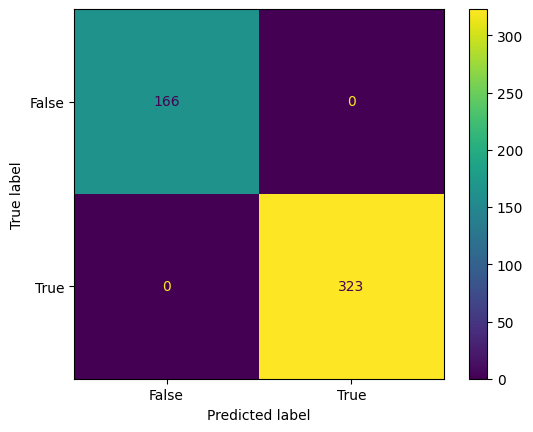

In [80]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_train, yhat_train)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
#plt.title(' TRAIN DATA RESULT')
cm_display.plot()
plt.show()

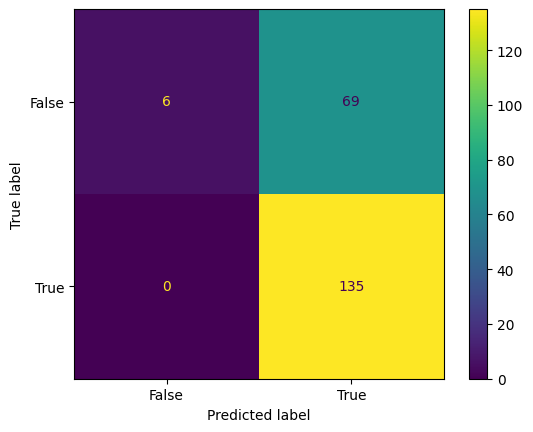

In [81]:
from sklearn import metrics
confusion_matrix_2 = metrics.confusion_matrix(y_test, yhat_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_2, display_labels = [False, True])
#plt.title(' TEST DATA RESULT')
cm_display.plot()
plt.show()

In [82]:
def trainRBFrandomic(xin, yin, centers):
    r = (np.linalg.norm(rand_centers[0] - rand_centers[1]) / 2) # o raio é a metade da distância entre cada quartile.
    try:
        N = xin.shape[0] # Number of samples
        n = xin.shape[1] # Input dimension
    except Exception as error:
        print(f"You're having the error {error}. So we will change the numer of dimensions...")
        n = 1
    xin = np.array(xin)
    yin = np.array(yin)
    
    
    m = np.array(centers) # Pegando os centros de cada cluster.
    covi = r*np.eye(n)
    inv_covi = (1 / r)*np.eye(n)# Calculando a matriz de covariancia inversa.

    # Para cada dado de entrada : 
    # 1- Aplicar a radial_n_var do dado de entrada para cada uma das p centróides, e por fim, encontrar toda a matriz H.
    # 2- Encontrar a matriz H para cada entrada em relação a cada centróide
    # 3- Lembrar que H[j, i] representa a distancia de cada ponto J até um centroide i.
    H = np.zeros((N, centers.shape[0]))
    for j in range(N):
        for i in range(centers.shape[0]):
            mi = m[i,] # A variável mi conterá os centros de cada centróide.
            H[j, i] = train_RBF.radial_n_var(xin[j, ], mi, inv_covi)
            
    print(f"H shape : {H.shape}")
    # Com a matriz H, a solução será obtida através da pseudoinversa.
    ones = np.ones((H.shape[0], 1))
    Haug = np.concatenate((H, ones), axis = 1)
    print(f"Haug shape : {Haug.shape}")
    print(f"yin shape : {yin.shape}")
    
    W = np.dot(np.linalg.pinv(Haug), yin)
    print(f"W shape : {W.shape}")

    return [m, covi, r, W, H]

In [84]:
first_quartile_vec = np.array(x_data.quantile(0.25)).reshape(1, -1)
third_quartile_vec = np.array(x_data.quantile(0.75)).reshape(1, -1)
rand_centers = np.concatenate((first_quartile_vec, third_quartile_vec), axis = 0)

In [97]:
from sklearn.metrics import accuracy_score
mean_acc = 0
lst_of_results = list()

for i in range(20): 
    ret_rand = trainRBFrandomic(x_data, y_data, rand_centers)
    yhat_test_rand_ = train_RBF.y_RBF(X_test, ret_rand)
    yhat_test_rand_[yhat_test_rand_ <= -0.5] = -1
    yhat_test_rand_[yhat_test_rand_ > -0.5] = 1

    yhat_train_rand = train_RBF.y_RBF(X_train, ret_rand)
    yhat_train_rand[yhat_train_rand <= -0.5] = -1
    yhat_train_rand[yhat_train_rand > -0.5] = 1
    lst_of_results.append(accuracy_score(y_test, yhat_test_rand_))
    mean_acc += accuracy_score(y_test, yhat_test_rand_)

lst_of_results = np.array(lst_of_results)
mean_acc = mean_acc / lst_of_results.shape[0]
stand_dev = 0
for i in range(20):
    stand_dev = (lst_of_results[i] - mean_acc) ** 2
stand_dev = stand_dev / lst_of_results.shape[0]

H shape : (699, 2)
Haug shape : (699, 3)
yin shape : (699,)
W shape : (3,)
H shape : (699, 2)
Haug shape : (699, 3)
yin shape : (699,)
W shape : (3,)
H shape : (699, 2)
Haug shape : (699, 3)
yin shape : (699,)
W shape : (3,)
H shape : (699, 2)
Haug shape : (699, 3)
yin shape : (699,)
W shape : (3,)
H shape : (699, 2)
Haug shape : (699, 3)
yin shape : (699,)
W shape : (3,)
H shape : (699, 2)
Haug shape : (699, 3)
yin shape : (699,)
W shape : (3,)
H shape : (699, 2)
Haug shape : (699, 3)
yin shape : (699,)
W shape : (3,)
H shape : (699, 2)
Haug shape : (699, 3)
yin shape : (699,)
W shape : (3,)
H shape : (699, 2)
Haug shape : (699, 3)
yin shape : (699,)
W shape : (3,)
H shape : (699, 2)
Haug shape : (699, 3)
yin shape : (699,)
W shape : (3,)
H shape : (699, 2)
Haug shape : (699, 3)
yin shape : (699,)
W shape : (3,)
H shape : (699, 2)
Haug shape : (699, 3)
yin shape : (699,)
W shape : (3,)
H shape : (699, 2)
Haug shape : (699, 3)
yin shape : (699,)
W shape : (3,)
H shape : (699, 2)
Haug s

In [100]:
print(f"The mean accuracy in test was ({mean_acc} +- {stand_dev}).")

The mean accuracy in test was (0.9142857142857144 +- 6.162975822039155e-34).


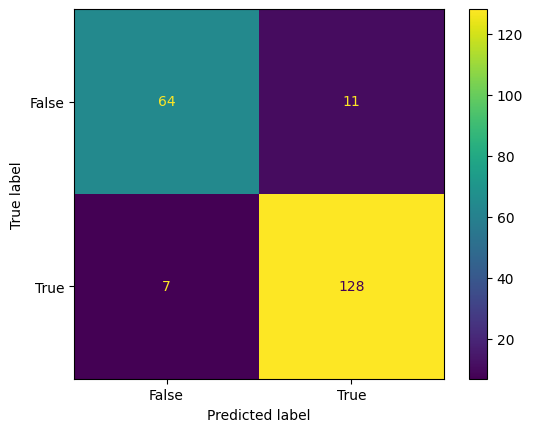

In [94]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, yhat_test_rand_)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
#plt.title(' TRAIN DATA RESULT')
cm_display.plot()
plt.show()

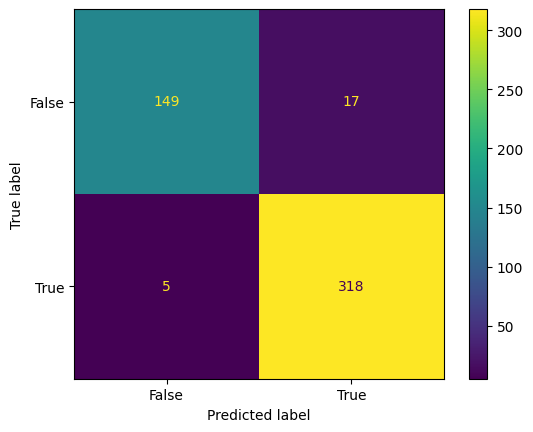

In [101]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_train, yhat_train_rand)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
#plt.title(' TRAIN DATA RESULT')
cm_display.plot()
plt.show()

#### Resultado semelhante, com N neuronios : 

In [102]:
from sklearn.cluster import KMeans
import train_RBF
from sklearn.metrics import accuracy_score

n_neurons = 0

for i in range(1, 185, 1):
    kmeans = KMeans(n_clusters = i, random_state = 0, n_init = 'auto').fit(X_train)
    cluster_labels = kmeans.labels_
    cluster_centers = kmeans.cluster_centers_
    ret_ = train_RBF.trainRBF(X_train, y_train, cluster_centers.shape[0], 0.6)
    
    yhat_test = train_RBF.y_RBF(X_test, ret_)
    yhat_test[yhat_test <= -0.5] = -1
    yhat_test[yhat_test > -0.5] = 1
    yhat_train = train_RBF.y_RBF(X_train, ret_)
    yhat_train[yhat_train <= -0.5] = -1
    yhat_train[yhat_train > -0.5] = 1
    
    acc_test = accuracy_score(y_test, yhat_test)
    if (acc_test > 0.68) & (acc_test < 0.73):
        n_neurons = i


H shape : (489, 1)
Haug shape : (489, 2)
yin shape : (489,)
W shape : (2,)
H shape : (489, 2)
Haug shape : (489, 3)
yin shape : (489,)
W shape : (3,)
H shape : (489, 3)
Haug shape : (489, 4)
yin shape : (489,)
W shape : (4,)
H shape : (489, 4)
Haug shape : (489, 5)
yin shape : (489,)
W shape : (5,)
H shape : (489, 5)
Haug shape : (489, 6)
yin shape : (489,)
W shape : (6,)
H shape : (489, 6)
Haug shape : (489, 7)
yin shape : (489,)
W shape : (7,)
H shape : (489, 7)
Haug shape : (489, 8)
yin shape : (489,)
W shape : (8,)
H shape : (489, 8)
Haug shape : (489, 9)
yin shape : (489,)
W shape : (9,)
H shape : (489, 9)
Haug shape : (489, 10)
yin shape : (489,)
W shape : (10,)
H shape : (489, 10)
Haug shape : (489, 11)
yin shape : (489,)
W shape : (11,)
H shape : (489, 11)
Haug shape : (489, 12)
yin shape : (489,)
W shape : (12,)
H shape : (489, 12)
Haug shape : (489, 13)
yin shape : (489,)
W shape : (13,)
H shape : (489, 13)
Haug shape : (489, 14)
yin shape : (489,)
W shape : (14,)
H shape : (

In [103]:
print(f"With {n_neurons} we have a good aproximation using KMeans algorithm...")

With 177 we have a good aproximation using KMeans algorithm...
